In [1]:
%reset -f
import sys
sys.path.insert(0, "..")
from wavhandler import *
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, make_scorer, log_loss
from utils_train import *
import deepdish as dd
from configs import DatasetConfiguration
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
from utils import *

In [13]:
mebios = DatasetConfiguration(names=['LG'])
mebios.select(name='LG', species=['LG_zapr_26_09']); 
mebios.read();
mebios.clean()
mebios.df.labels.value_counts()
mebios.parse_filenames()

Dataset - LG - exists: True


In [14]:
mebios.df.labels.value_counts()


LG_zapr_26_09    7124
Name: labels, dtype: int64

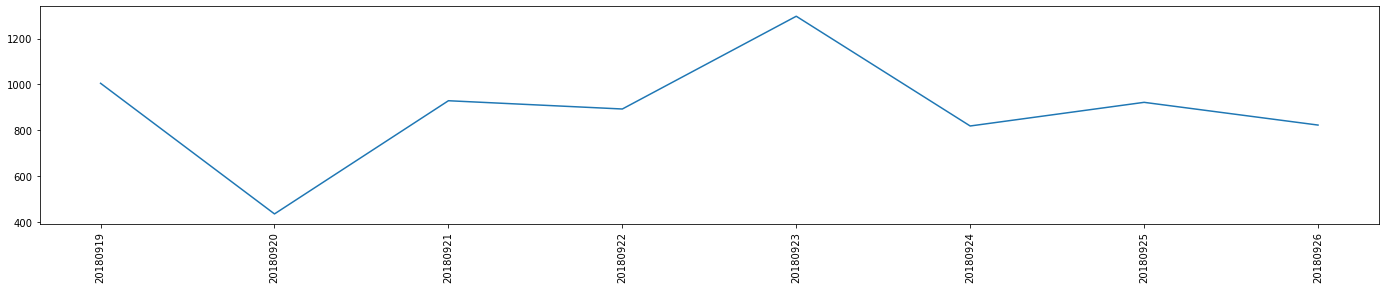

In [15]:
start = mebios.df_info.sort_values(by='datestr').iloc[0].datestr
end = mebios.df_info.sort_values(by='datestr').iloc[-1].datestr
mebios.plot_daterange(start, end)

(0, 2100)

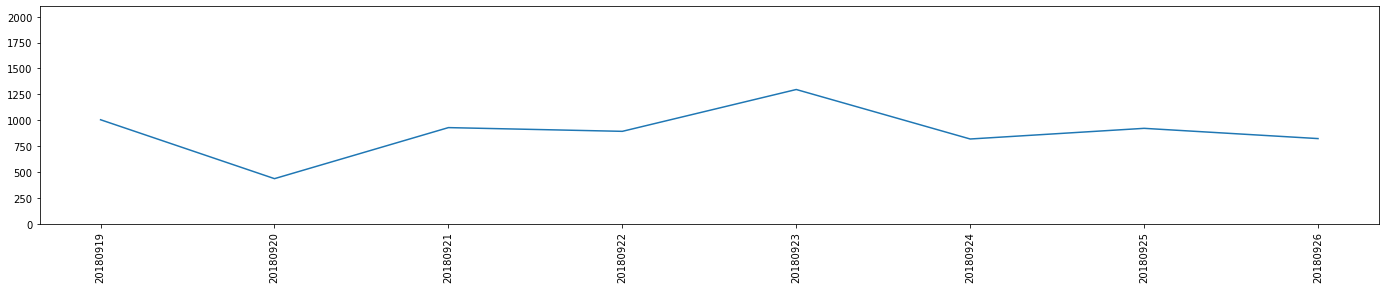

In [16]:
mebios.plot_daterange(start, end)
plt.ylim(0,2100)

Dataset - Melanogaster_RL - exists: True


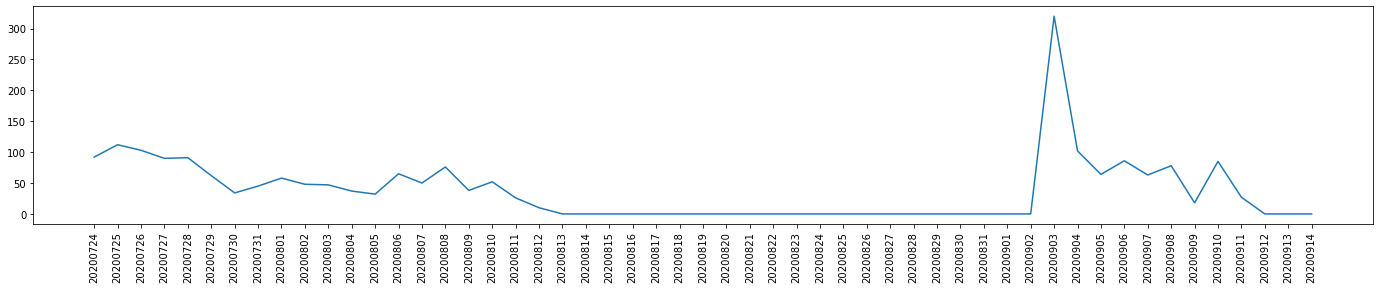

In [48]:
mebios = DatasetConfiguration(names=['Melanogaster_RL'])
mebios.select_all();#(name='Suzukii_RL', species=['L']); 
mebios.read();
mebios.df.labels.value_counts()
mebios.parse_filenames()
start = mebios.df_info.sort_values(by='datestr').iloc[0].datestr
end = mebios.df_info.sort_values(by='datestr').iloc[-1].datestr
mebios.plot_daterange(start, '20200914')

In [22]:
sub[sub.labels=='R'][['datestr']]

,datestr
0,20200901
1,20200901
2,20200901
3,20200901
4,20200901
...,...
14343,20200825
14344,20200825
14345,20200826
14346,20200825


In [7]:
z = get_clean_wingbeats(names=mebios.fnames.tolist())
# test = test[test['psd_score'] > 150].drop('psd_score', axis=1)

In [15]:
q = make_df_parallel(names=mebios.fnames.tolist(), setting='psdflt')

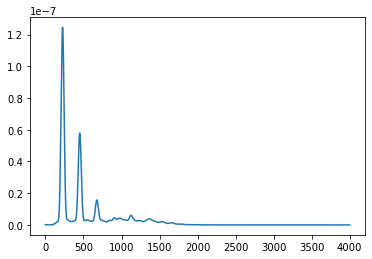

In [83]:
q.iloc[np.random.randint(0,400),:].plot()

In [85]:
mebios = DatasetConfiguration(names=['Wingbeats'])
mebios.select_all(); 
mebios.read();
mebios.df.labels.value_counts()

Dataset - Wingbeats - exists: True


Ae. aegypti            85553
C. quinquefasciatus    74599
An. gambiae            49471
C. pipiens             30415
Ae. albopictus         20231
An. arabiensis         19297
Name: labels, dtype: int64

In [86]:
mebios.parse_filenames()

In [114]:
# mebios.df_info[mebios.df_info.wavnames.apply(lambda x: ''.join(x.split('_')[:2])).duplicated()].sort_values(by='wavnames')

In [145]:
sub = mebios.df_info[mebios.df_info.labels == 'C. pipiens']
sub[sub.wavnames.apply(lambda x: ''.join(x.split('_')[:2])).duplicated()].sort_values(by='wavnames')

,fnames,labels,wavnames,date,datestr,date_day,date_hour,gain,temperature,humidity
278049,/home/kalfasyan/data/insects/Wingbeats/C. pipi...,C. pipiens,F161205_171633_190_G_050,2016-12-05 17:16:33,20161205,5,17,050,NaN,NaN
278793,/home/kalfasyan/data/insects/Wingbeats/C. pipi...,C. pipiens,F161205_175713_244_G_050,2016-12-05 17:57:13,20161205,5,17,050,NaN,NaN
278785,/home/kalfasyan/data/insects/Wingbeats/C. pipi...,C. pipiens,F161205_180003_246_G_050,2016-12-05 18:00:03,20161205,5,18,050,NaN,NaN
278778,/home/kalfasyan/data/insects/Wingbeats/C. pipi...,C. pipiens,F161205_182920_030_G_050,2016-12-05 18:29:20,20161205,5,18,050,NaN,NaN
249641,/home/kalfasyan/data/insects/Wingbeats/C. pipi...,C. pipiens,F161205_184040_046_G_050,2016-12-05 18:40:40,20161205,5,18,050,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
270489,/home/kalfasyan/data/insects/Wingbeats/C. pipi...,C. pipiens,F170220_031507_219_G_050_T_25.9_H_73.6,2017-02-20 03:15:07,20170220,20,3,050,25.9,73.6
251681,/home/kalfasyan/data/insects/Wingbeats/C. pipi...,C. pipiens,F170220_043913_054_G_050_T_25.9_H_69.7,2017-02-20 04:39:13,20170220,20,4,050,25.9,69.7
272275,/home/kalfasyan/data/insects/Wingbeats/C. pipi...,C. pipiens,F170220_073816_150_G_050_T_25.9_H_68.7,2017-02-20 07:38:16,20170220,20,7,050,25.9,68.7
272288,/home/kalfasyan/data/insects/Wingbeats/C. pipi...,C. pipiens,F170220_082855_171_G_050_T_25.2_H_64.3,2017-02-20 08:28:55,20170220,20,8,050,25.2,64.3


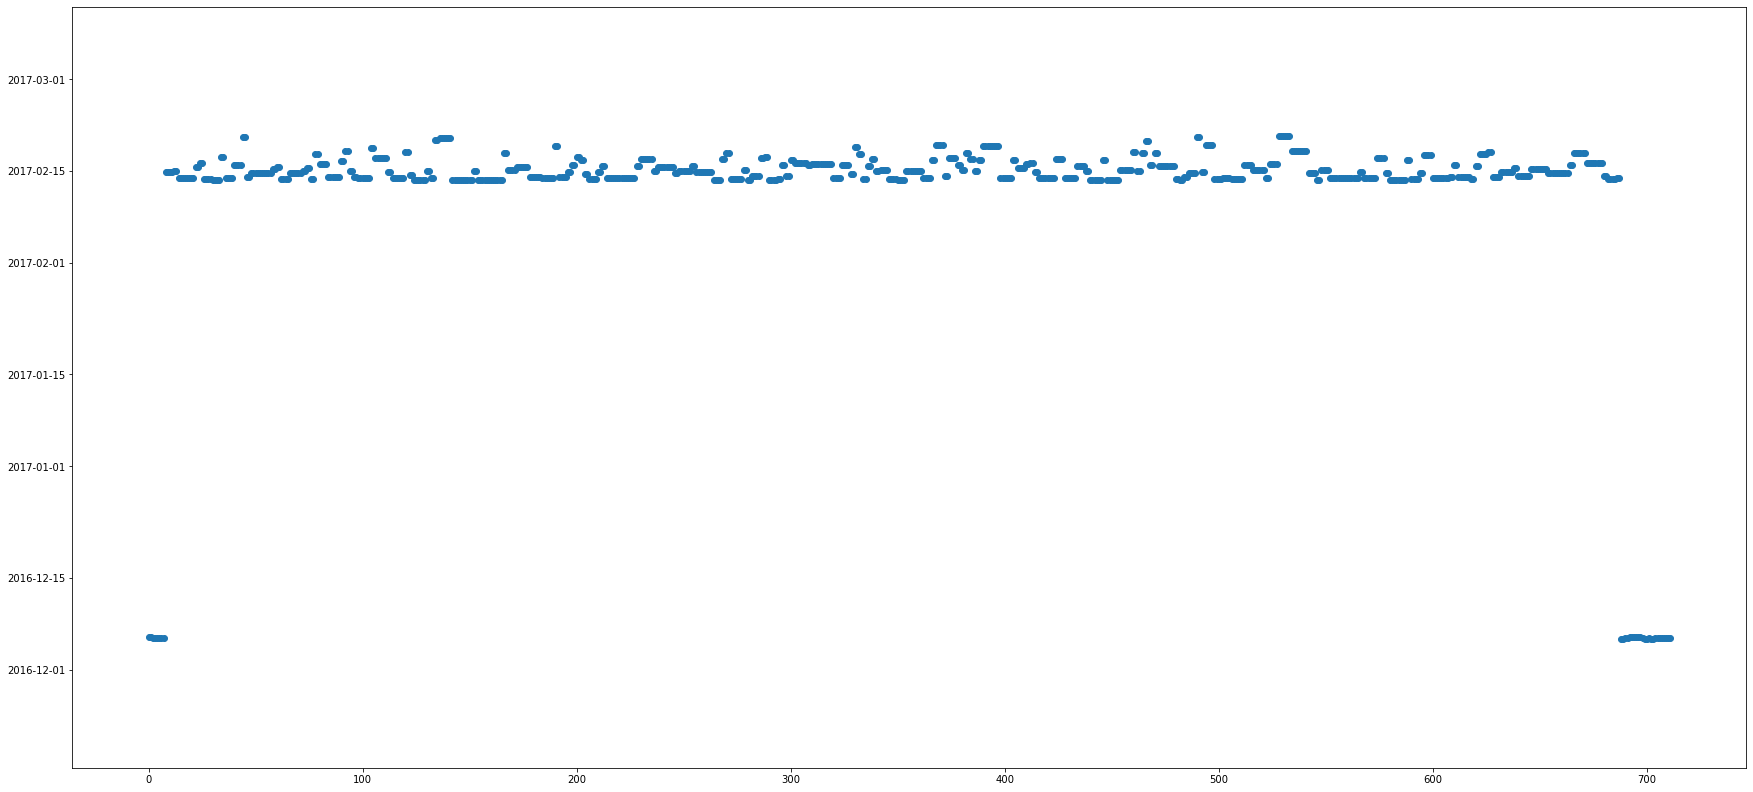

In [169]:
q1 = sub[sub.wavnames.apply(lambda x: ''.join(x.split('_')[:2])).duplicated(keep=False)].date
q2 = q1.reset_index(drop=True).index.values
plt.figure(figsize=(30,14))
plt.scatter(q2,q1)